In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import wandb

# Download PII Logs from WANDB
if False:
    api = wandb.Api()

    # Project is specified by <entity/project-name>
    runs = api.runs("ENTITY/PROJECT-NAME")

    summary_list, config_list, name_list = [], [], []
    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

    df_raw = pd.DataFrame({
        "summary": summary_list,
        "config": config_list,
        "name": name_list
        })

    df_raw.to_csv(Path(os.getenv('WANDB_DIR')) / "wandb_project_runs.csv",
              index=False)
else:
    df_raw = pd.read_csv(Path(os.getenv('WANDB_DIR')) / "wandb_project_runs.csv")

print(df_raw.columns)

Index(['summary', 'config', 'name'], dtype='object')


In [2]:
# Kaggle Public Leaderboard (kplb) Results
kplb = {
    'chromatic-chrysanthemum-163': 0.963,
    'thriving-wonton-144': 0.961,
    'driven-tree-189': 0.957,
    'sweet-snake-169': 0.957,
    'pious-meadow-184': 0.956,
    'vivid-bao-154': 0.956,
    'worthy-aardvark-204': 0.955,
    'confused-firefly-208': 0.954,
    'resplendent-dragon-148': 0.953,
    'abundant-rooster-170': 0.951,
    'pious-durian-196': 0.947,
    'firm-wind-195': 0.942,
    'fancy-paper-190': 0.939,
    'ancient-serenity-223': 0.937,
    }

In [3]:
exp_names = list(kplb.keys())
df = df_raw[df_raw.name.isin(exp_names)].reset_index(drop=True).copy()
df['summary'] = df['summary'].apply(lambda x: eval(x))
dfe = df['summary'].apply(pd.Series)
df = pd.concat([df, dfe], axis=1)
df['kplb'] = np.nan
for name, score in kplb.items():
    df.loc[df.name == name, 'kplb'] = score
df.sort_values(by=['kplb'], ascending=False, inplace=True)

In [4]:
cols = ['name', 'best_val_metric', 'best_f5', 'kplb']
df[cols].head(100)

,name,best_val_metric,best_f5,kplb
10,chromatic-chrysanthemum-163,0.970347,0.975142,0.963
13,thriving-wonton-144,0.973530,0.941574,0.961
6,driven-tree-189,0.968736,0.974943,0.957
9,sweet-snake-169,0.975841,0.979561,0.957
7,pious-meadow-184,0.967515,0.970453,0.956
11,vivid-bao-154,0.973795,0.976708,0.956
2,worthy-aardvark-204,0.975730,0.981240,0.955
1,confused-firefly-208,0.979274,0.979538,0.954
12,resplendent-dragon-148,0.971041,0.937234,0.953
8,abundant-rooster-170,0.973778,0.979323,0.951


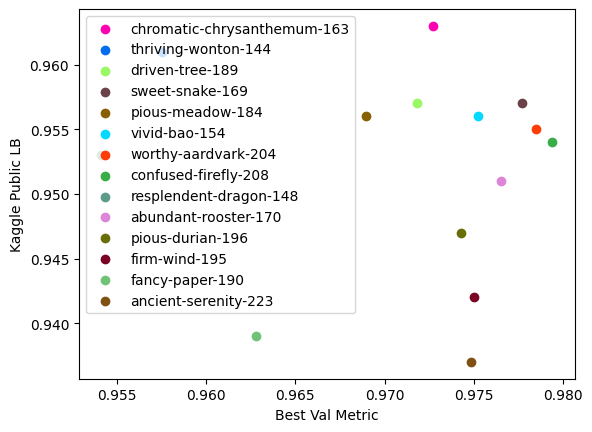

In [5]:
# List of matplotlib XKCD colors
all_colors = list(mcolors.XKCD_COLORS.keys())
x = list((df.best_val_metric + df.best_f5) / 2)
# x = df.best_val_metric.tolist()
y = df.kplb.tolist()
labels = df.name.tolist()

# Generate random indices for colors
np.random.seed(0)  # For reproducibility
color_indices = np.random.choice(len(all_colors), size=len(x), replace=False)

# Create scatter plot
fig, ax = plt.subplots()
for i in range(len(x)):
    ax.scatter(x[i], y[i], c=all_colors[color_indices[i]], label=labels[i])
ax.set_xlabel('Best Val Metric')
ax.set_ylabel('Kaggle Public LB')
# Add legend
ax.legend()

plt.show()